# Chpater3. Classification

## MNIST
 - MNIST : 고등학생과 미국 인구조사국 직원들이 손으로 쓴 70,000개 손글씨 이미지를 모은 데이터셋

## LOAD DATA

In [1]:
#MNIST 데이터 세트를 다운로드 하기 위한 코드#MNIST  
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST Original', data_home="./datasets/") 
# 에러가 날 경우 data_home 으로 다운받을 곳 지정 필요.
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

데이터는 딕셔너리 구조로 되어있음.

 - DESC : Description
 - data : 샘플의 하나의 행, 특성이 하나의 열로 구성된 배열
 - target = : 레이블 배열

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
X.shape, y.shape

((70000, 784), (70000,))

- 이미지 갯수 : 70000
- 특성 : 784, 28 x 28 이미지

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import rc

rc('font', family="AppleGothic")  

(-0.5, 27.5, 27.5, -0.5)

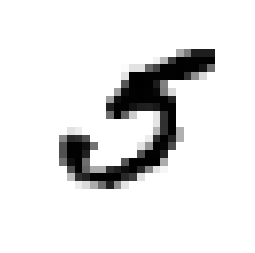

In [5]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")


In [6]:
y[36000]

5.0

훈련세트 분리, 앞쪽 6만개 : 훈련, 뒤쪽 1만개 : 테스트 

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

모든 교차 검증 폴드가 비슷해지도록 만든다. 훈련 샘플의 순서에 민감해서 성능이 나빠질 수 있어 섞어서 진행.

In [8]:
import numpy as np

In [9]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## 3.2 이진 분류기 훈련 
 - 단순히 숫자 하나를 맞나 아니냐를 분류하는 이진 분류기(Binary Classifier)를 개발할 예정.
 - 문제를 단순화하기위해 하나의 숫자, 예를 들어 5만 식별 
 - 5 감지기  : 5와 5 아님 클래스를 구분, **이진 분류기(Binary classifier)**

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

SkLearn의 SGDClassifier클래스를 사용해 **확률적 경사 하강법(Stochastic Gradient Descent, SGD)**분류기로 시작해보는 것도 나쁘지 않다. 
- 이 분류기는 매우 큰 데이터셋을 호율적으로 처리하는 장점을 가지고 있음. 
- 한번에 하나씩 훈련 샘플을 독리접으로 처리하기 때문에 (온라인 학습에 용이하다.)

In [11]:
from sklearn.linear_model import SGDClassifier

In [12]:
X_train[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
y_train_5[:5]

array([False, False, False, False, False], dtype=bool)

In [14]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

해당 분류기는 해당 Some_digit 이미지가 5라고 분류했다. 

In [15]:
sgd_clf.predict([some_digit])

array([False], dtype=bool)

## 3.3 성능 측정

### 3.3.1 교차 검증(Cross-Validation)을 사용한 정확도 측정 
 - 학습 모델을 평가하는 좋은 방법은 Cross-validation인데 Chapter 2와 동일하게 하는 방법이 좋은 방법이다. 
 - 가끔은 Sk-learn에서 제공하는 것이 많은 제어가 필요할 때가 있다, 이때는 직접 구현하면 된다. 

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [17]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

In [18]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf) # 이미 만들어 놓은 SGD Classifier
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95805
0.96615
0.95655


Cross_val_score() 함수로 폴드가 3개인 K-겹 교차 검증을 사용해 해당 모델을 검증해 볼 것이다. 

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.95805,  0.96615,  0.95655])

모든 Fold에 대해 정확도(Accuracy)가 95% 이상입니다. 모든 이미지를 5아님 클래스로 분류하는 더미 분류기를 만들어 비교. 

In [21]:
from sklearn.base import BaseEstimator

In [22]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [23]:
never_5_clf = Never5Classifier()

In [24]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy') 
# 그냥 5가 아니라고 만 해도 90%이상 정답이다, 즉, 그냥 5가 아니라 라고만 말해도 된다.

array([ 0.9081 ,  0.9098 ,  0.91105])

**정확도를 분류기의 성능 측정 지표로 선호하지 않는 이유**를 보여준다. 특히 불균형한 데이터셋을 다룰때 더욱 그렇다.

### 3.3.2 오차 행렬(Confusion Matrix)
 - 분류기의 성능을 조사하는 더 좋은 방법은 Confusion Matrix를 이용하는 것. 
 - 기본 아이디어는 클래스 A의 샘플이 클래스 B로 분류된 횟수를 세는 것이다. 예) 숫자 5의 이미지를 3으로 잘못 분류한 횟수를 알고싶다면 Confusion Matrix의 5행 3열을 보면 된다. 
 - Confusion Matrix를 만들려면 실제 타깃과 비교할 수 있도록 먼저 예측 값을 만들어야한다. 테스트 세트로 예측을 만들 수 있지만 이것은 출시 전 가장 마지막 단계에 행해야 되는 데이터 이다.
 - **cross_val_predict()**를 이용 할 수 있다.

In [25]:
from sklearn.model_selection import cross_val_predict

In [26]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [27]:
y_train_pred # 점수를 반환하는 것이 아니라 해당 예측 값을 반환 한다. 

array([False, False, False, ..., False, False, False], dtype=bool)

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_train_5, y_train_pred)

array([[54069,   510],
       [ 1875,  3546]])

#### Confusion Matrix의 표현 
| 실제 \ 예측  | Negative | Positive |
| -------- | -------- | -------- |
| Negative | 53989    | 590      |
| Positive | 1343     | 4078     |


 - 행 : 실제 클래스 
 - 열 : 예측 클래스 
 - 표현 (예측, 실제), 예) 원래는 5가 맞지만 5가 아니라고 예측했다면 (False Positive), 5가 맞고 예측도 5가 맞다면 True Positive 
 - 이 행렬의 첫번째 행은 5 아님 이미지 (음성 Negative Class), 53989개를 5 아님으로 정확하게 분류 => True Negative
 - 나머지 590개는 5라고 잘못 분류 (거짓 양성, False Negative)
 - 두번째 행 : 1,343개를 5가 아니라고 예측 (False Positive)  
 - 나머지 4,078개는 정확히 5라고 분류(True Positive)

#### 간결한 표현
 - **Precision**(정밀도) : 양성 예측 정확도 => 예측한 Positive 중에 실제로 Positive 인 비율 => 내가 시험에 찍은 것 중에 얼마나 맞았나.
 
 정밀도 = $\frac{(TP)}{(TP + FP)}$
  - TP : True Positive 진짜 양성의 수
  - FP : False Positive 거짓 양성의 수
  
 - **Recall**(재현율) : 분류기가 정확하게 감지한 양성 샘플의 비율, 민감도(**Sensitivity**) 또는 True Positive Rate(**TPR**)이라고도 한다.
 
 재현율 = $\frac{(TP)}{(TP + FN)}$ => 실제 Positive 중에 예측한 Positive의 비율이 어떻게 되는가 => 암 환자 판별, 실제 암 환자 중에 내가 판별한 환자 수가 얼마나 되는가 ?
 
 - 즉, 찾는 요건에 따라 두개를 어떻게 쓸것인지 무엇이 중요한 것인지 달라 진다. 
 - Pricision과 Recall은 Trade Off 관계에 있다. 하나가 높아지면 하나는 낮아진다. 

### 3.3.3 Precision & Recall 

In [30]:
from sklearn.metrics import precision_score, recall_score

In [31]:
precision_score(y_train_5, y_train_pred) # 5라고 예측한 놈들 중에 실제 5인 놈들은 87% 

0.87426035502958577

In [32]:
recall_score(y_train_5, y_train_pred) # 실제 5 중 5 라고 예측률이 75% 확떨어졌다.

0.65412285556170446

Precision & Recall 을 하나로 만들 점수를 *F1-Score* 이라고한다. 
 - F1 = Precision & Recall의 조화 평균(harmonic mean)

$$F1 = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}$$

In [33]:
from sklearn.metrics import f1_score

In [34]:
f1_score(y_train_5, y_train_pred)

0.74833808167141502

### 3.3.4 Preicision / Recall Trade Off 
SGDClassifier 가 분류를 어떻게 결정하는지 살표보며 이 트레이드오프를 이해해보겠다.
 - **Decision function**(결정함수)를 사용하여 각 샘플의 점수를 계산. 
 - 위 점수가 임계값보다 크면 샘플을 양성 클래스에 할당 그렇지 않으면 음성 클래스에 할당. 

![임계값](./datasets/img/3-1.png)

- 결정임계값을 가운데(5사이) 라고 가정, 임곗값 오른쪽 4의 진짜 양성(실제 숫자5) 과 하나의 거짓 (실제 숫자6)이 있다. 그렇기 떄문에 임계값에서 Precision은 4/5 => 80%, Recall = 4/6 => 67%이다. 
- 임계값을 높이게 되면 오른쪽 Precision 100%, Recall 50%
- 임계값을 내리게 되면 왼쪽 Precision 75%, Recall 100% 가 된다. 

사이킷런에서는 임계값을 지정할 수 없지만, 예측한 점수의 값은 확인 할 수 있다. decision_function()을 호출하면 각 점수를 얻을수 있다. 

In [35]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-16016.49323517])

In [36]:
threshold = 0

In [37]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

In [38]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

적절한 임계값 설정은 cross_val_predict()을 통해 모든 샘플의 점수를 구해야 된다. 이번에는 예측 결과가 아니라 결정 점수를 반환하도록 

In [39]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [40]:
y_scores

array([-455392.37511577, -359113.7369136 , -479232.74248079, ...,
       -253529.85382844, -816957.53257309, -344110.30447745])

precision_recall_curve()함수를 사용하여 모든 임계값에 대한 Precision과 Recall 을 구할 수 있다. 

In [41]:
from sklearn.metrics import precision_recall_curve

In [42]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [43]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("thresholds")
    plt.legend(loc="center left")
    plt.ylim([0,1])

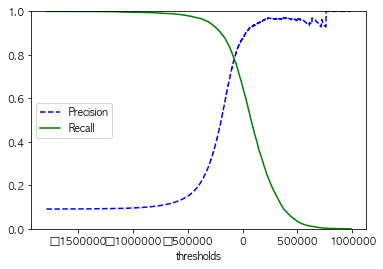

In [44]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

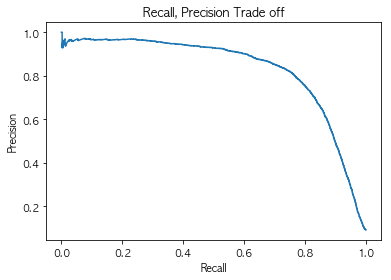

In [45]:
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall, Precision Trade off")

- Precision 90% 가 목표라고 가정하면, 그래프에서 임계값이 약 70,000 정도라는 것을 알 수 있다. (Trade off graph)
- 예측을 만들기 위해 분류기의 predict() 메서드를 호출하는 대신 다음 코드를 실행하면 된다. 

In [46]:
y_train_pred_90 = (y_scores > 70000)

In [47]:
precision_score(y_train_5, y_train_pred_90)

0.92585236676597149

In [48]:
recall_score(y_train_5, y_train_pred_90)

0.51595646559675334

**tips** 누군가가 99% Precision을 달성한 모델이 있다고하면 Recall 점수는 어떻게 되는지 물어봐야 한다. 

### ROC Curve
 - Receiver operating characteristic(ROC) 곡선도 이진 분류에서 많이 사용하는 도구
 - Precision / Recall 곡선과 매우 비슷하지만, ROC Curve 는 Precisiond에 대한 Recall 그래프가 아니라 거짓양성비율(false positive rate)에 대한 진짜 양성비율(true positive rate)의 곡선이다. 
 - 양성으로 잘못 분류된 음성 샘플 비율이 FPR 이다, 이는 1 - 음성으로 정확하게 분류한 음성 샘플의 비율인 진짜 음성 비율(true negative), 1 - TRN
 - TRN을 특이도(specificity)라고 한다. ROC 곡선은 민감도(Recall, 재현율)에 대한 1-특이도, 그래프 

In [49]:
from sklearn.metrics import roc_curve

In [50]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [51]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('거짓 양성 비율')
    plt.ylabel('진짜 양성 비율')

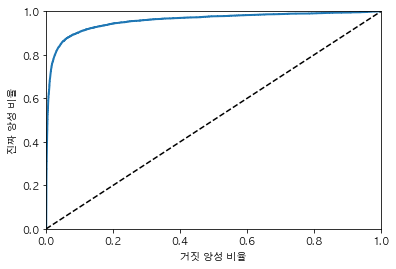

In [52]:
plot_roc_curve(fpr, tpr)

여기서도 트레이드오프가 있다. 재현율(TPR)이 높을 수록 분류기가 만드는 거짓 양성(FPR)이 늘어난다. 
- 점섬은 완전한 랜덤 분류기 ROC Curve이다.
- 좋은 분류기는 이 점선으로부터 최대한 멀리 떨어져야 한다. 

**AUC(Area Under the curve)**곡선아래면적을 측정하면 분류기들을 비교할 수 있다. 

In [53]:
from sklearn.metrics import roc_auc_score

In [54]:
roc_auc_score(y_train_5, y_scores)

0.95784783282465014

**RandomForestClassifier**를 이용하여 SGD와 비교해 보겠다. 하지만 RandomForest에서는 decision_function()메서드가 없다. 대신에 predict_proba()가 있다. 
 - predict_proba()는 샘플이 행, 클래스가 열이고 샘플이 주어진 클래스에 속할 확률을 담은 배열을 반환 

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [57]:
y_scores_forest = y_probas_forest[:,1]

In [58]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

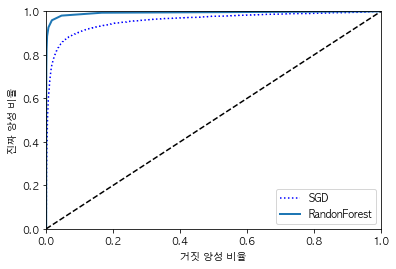

In [59]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "RandonForest")
plt.legend(loc="lower right")

In [60]:
print("SGDClassifier AUC :", roc_auc_score(y_train_5, y_scores))
print("Random Forest AUC : ", roc_auc_score(y_train_5, y_scores_forest))

SGDClassifier AUC : 0.957847832825
Random Forest AUC :  0.993449212741


## 3.4 MultiClass Classifier (다중 분류기)
 - 이진 분류기는 두 개의 클래스를 구별하는 반면 다중 분류기 (Mutliclass Classifier)는 둘 이상의 클래스를 구별한다. 
 - RandomForest or Naive Bayes 와 같은 일부 알고리즘은 여러개의 클래스를 직접 처리 할 수 있으나, SVM or Linear Classifier의 경우 이진 분류만 가능.
 - 이진 분류기를 여러개를 사용 => 다중 클래스 분류하는 기법도 있음. 예) 숫자 하나만 구분하는 분류기 10개 (0~9)를 훈련시켜 클래스가 10개인 숫자 이미지 분류 시스템을 만들 수 있다. 이미지를 분류할때 각 분류기의 결정 점수 중 가장 높은 클래스를 선택. 
 - 이를 One-versus-all, One-versus-the-Rest (OvA) 전략이라고 함.
 - 또 다른 전략, 0과 1, 0과2, 1과 2 구별 등과 같이 각 숫자의 조합마다 이진 분류기를 훈련  이를 One-versus-One(OvO) 전략이라고 함. 

In [61]:
sgd_clf.fit(X_train, y_train) # y_train_5가 아니고 y_train 을 사용. 
sgd_clf.predict([some_digit])

array([ 5.])

내부에서는 실제로 10개의 이진 분류기를 훈련시키고 각각의 결정 점수를 얻어 점수가 가장 높은 클래스를 선택. 

In [62]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-138810.68223804, -571376.35388861, -444195.26590999,
        -243158.18583371, -389040.37177061,  -16016.49323517,
        -645485.19919766, -408759.69323301, -594353.84121073,
        -459403.61610335]])

In [63]:
np.argmax(some_digit_scores)

5

In [64]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [65]:
sgd_clf.classes_[5]

5.0

사이킷런에서는 OvO, OvA을 사용하도록 강제하려면 OneVsOneClassifier or OneVsRestClassifier를 사용. 

In [66]:
from sklearn.multiclass import OneVsOneClassifier

In [68]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [69]:
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False),
          n_jobs=1)

In [70]:
ovo_clf.predict([some_digit])

array([ 5.])

In [71]:
len(ovo_clf.estimators_)

45

RandomForest 를 훈련시키는 법도 간단하다. 

In [72]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [73]:
forest_clf.predict([some_digit])

array([ 5.])

In [74]:
forest_clf.predict_proba([some_digit])

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0.8,  0.1,  0. ,  0.1,  0. ]])

분류기 평가에는 일반적으로 교차 검정을 사용한다. **cross_val_score()**

In [75]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.84683063,  0.86449322,  0.86547982])

성능을 더 높일 여지가 있다. 예를 들어 간단하게 입력의 스케일을 조정 정확도를 90% 이상으로 높일 수 있다. 

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()

In [83]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [84]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.9115177 ,  0.90824541,  0.90763615])

## 3.5 Analysis Errors, 에러분석 
 - 실제 프로젝트라면 머신러닝 프로젝트 체크리스트(부록B) 단계를 다른다. 
 - 준비 단계에서 가능한 선택사항을 탐색, 여러 모델을 시도, 가장 좋은 몇 개를 골라 GridSearchCV를 사용하여 Hyper Parameters를 튜닝. 그리고 자동화 
 - 이 절에서는 가장 가능성이 높은 모델을 하나 찾았다고 가정하고 이 모델의 성능을 향상시킬 방법을 찾는다. 한 방법은 에러의 종류를 분석 

In [85]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [87]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5737,    2,   19,    9,   13,   47,   44,    7,   40,    5],
       [   1, 6480,   41,   26,    6,   43,    6,   13,  113,   13],
       [  50,   37, 5310,  113,   86,   23,   97,   55,  169,   18],
       [  49,   39,  141, 5343,    1,  231,   35,   52,  143,   97],
       [  17,   29,   36,    7, 5385,   11,   51,   35,   75,  196],
       [  72,   40,   40,  179,   77, 4608,  104,   32,  171,   98],
       [  31,   26,   50,    2,   45,  101, 5614,    6,   42,    1],
       [  24,   23,   68,   31,   53,   12,    8, 5780,   15,  251],
       [  51,  163,   81,  162,   12,  165,   56,   32, 4982,  147],
       [  43,   34,   26,   86,  158,   36,    2,  179,   76, 5309]])

가운데 네모 색이 하얀색일 수록 잘 분류 한다는 의미이다. 
- 그래프의 에러부분에 초점을 맞춰보겠다. 오차 행렬의 각 값을 대응하는 클래스의 이미지 개수로 나누어(에러의 절대 개수가 아니라) 에러 비율을 비교합니다.(개수로 비교하면 이미지가 많은 클래스가 상대적으로 나쁘게 보입니다.)

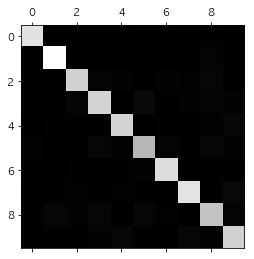

In [88]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [91]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

In [92]:
norm_conf_mx = conf_mx / row_sums

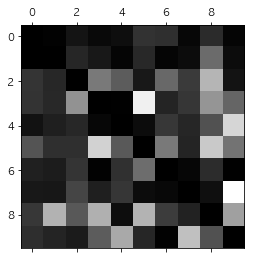

In [93]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)